In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1_73zRqwSSvCTJTXQ-63nAaTsP1KmoVym
!unzip -o CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [3]:

imageFolder = './CNN_dataset/'

typeNames = sorted([x for x in os.listdir(imageFolder) if os.path.isdir(os.path.join(imageFolder, x))])
classCount = len(typeNames)
imageFiles = [[os.path.join(imageFolder, typeName, x) 
                for x in os.listdir(os.path.join(imageFolder, typeName))] 
               for typeName in typeNames]
imageFileList = []
imageLabelList = []
for i, typeName in enumerate(typeNames):
    imageFileList.extend(imageFiles[i])
    imageLabelList.extend([i] * len(imageFiles[i]))
totalNum = len(imageFileList)


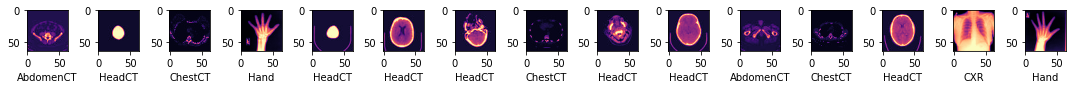

In [4]:
plt.subplots(1, 15, figsize=(15, 15))
for i,k in enumerate(np.random.randint(totalNum, size=15)):
    img = Image.open(imageFileList[k])
    arr = np.array(img)
    plt.subplot(1, 15, i + 1)
    plt.xlabel(typeNames[imageLabelList[k]])
    plt.imshow(arr, cmap='magma')
plt.tight_layout()
plt.show()

In [5]:
testFractionValue = 0.20
modelTrainX, modelTrainY = [], []
modelTestX, modelTestY = [], []

for i in range(totalNum):
    ran = np.random.random()
    if ran < testFractionValue:
        modelTestX.append(cv2.imread(imageFileList[i]))
        modelTestY.append(imageLabelList[i])
    else:
        modelTrainX.append(cv2.imread(imageFileList[i]))
        modelTrainY.append(imageLabelList[i])


In [6]:
modelTrainX = np.array(modelTrainX)
modelTrainY = np.array(modelTrainY)
modelTestX  = np.array(modelTestX)
modelTestY  = np.array(modelTestY)
modelTrainY = to_categorical(modelTrainY, classCount)
modelTestY = to_categorical(modelTestY, classCount)

modelTrainX = modelTrainX.astype('float32') / 255
modelTestX = modelTestX.astype('float32') / 255
print("modelTrainX shape:", modelTrainX.shape, "modelTrainY shape:", modelTrainY.shape)

modelTrainX shape: (40055, 64, 64, 3) modelTrainY shape: (40055, 5)


In [7]:
cnnModel = Sequential()
cnnModel.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
cnnModel.add(MaxPooling2D(pool_size=(2,2)))
cnnModel.add(Dropout(0.5))
cnnModel.add(Flatten())
cnnModel.add(Dense(64, activation='relu'))
cnnModel.add(Dropout(0.5))
cnnModel.add(Dense(5, activation='softmax'))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [8]:
cnnModel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [9]:
modelLog=cnnModel.fit(modelTrainX, modelTrainY,
          batch_size=60,
          epochs=5,
          verbose=1,
          validation_split=.15)

Epoch 1/5
568/568 [==============================] - 17s 13ms/step - loss: 0.1996 - accuracy: 0.9296 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/5
568/568 [==============================] - 7s 13ms/step - loss: 0.0440 - accuracy: 0.9872 - val_loss: 3.4126e-04 - val_accuracy: 1.0000
Epoch 3/5
568/568 [==============================] - 6s 11ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 3.7644e-05 - val_accuracy: 1.0000
Epoch 4/5
568/568 [==============================] - 6s 10ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 8.4089e-04 - val_accuracy: 1.0000
Epoch 5/5
568/568 [==============================] - 5s 10ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0016 - val_accuracy: 0.9998


In [10]:
testPrediction = cnnModel.predict(modelTestX)
testPredictionLabels = np.argmax(testPrediction, axis=1)
testTrueLabels = np.argmax(modelTestY, axis=1)
confusionMatrix = confusion_matrix(testTrueLabels, testPredictionLabels)
print(confusionMatrix)

311/311 [==============================] - 1s 3ms/step
[[2015    0    0    0    0]
 [   0 1992    0   11    0]
 [   0    0 1966    0    0]
 [   0    0    0 1976    0]
 [   0    0    0    0 1985]]


In [11]:
print(classification_report(testTrueLabels,testPredictionLabels, target_names=typeNames,digits=7))


              precision    recall  f1-score   support

   AbdomenCT  1.0000000 1.0000000 1.0000000      2015
         CXR  1.0000000 0.9945082 0.9972466      2003
     ChestCT  1.0000000 1.0000000 1.0000000      1966
        Hand  0.9944640 1.0000000 0.9972243      1976
      HeadCT  1.0000000 1.0000000 1.0000000      1985

    accuracy                      0.9988939      9945
   macro avg  0.9988928 0.9989016 0.9988942      9945
weighted avg  0.9989000 0.9988939 0.9988939      9945

